# 相关包

In [1]:
from sklearn import tree
from sklearn.model_selection import train_test_split as TTS
import pandas as pd
import numpy as np
import graphviz
import os
path="E:\code_space\Jupyter\sparse_genotype"
os.chdir(path)

# 导入相关数据

In [2]:
X=pd.DataFrame(pd.read_excel('file\\relapse\PreprocX.xlsx',header=None))
X

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102
0,351464.738776,-5.689681e+03,-260.729309,-1.592433e+04,-5.105779e+03,-1567.776654,6356.521703,-28646.122722,-30346.209052,-2124.444807,...,6619.032030,6593.544237,6551.744256,6588.446678,6621.071054,6612.914960,6600.680819,6600.680819,6591.505213,6606.273141
1,-5689.680689,1.303107e+06,-9409.900562,-2.535489e+04,-1.453634e+04,-10998.339778,-3074.041420,-38076.685846,-39776.772175,-11555.007931,...,-2811.531093,-2837.018886,-2878.818868,-2842.116445,-2809.492070,-2817.648163,-2829.882304,-2829.882304,-2839.057910,-2824.289983
2,-260.729309,-9.409901e+03,719890.757315,-1.957420e+04,-8.755651e+03,-5217.648560,2706.649798,-32295.994628,-33996.080957,-5774.316713,...,2969.160125,2943.672332,2901.872350,2938.574773,2971.199148,2963.043055,2950.808914,2950.808914,2941.633308,2956.401235
3,-15924.325401,-2.535489e+04,-19574.197306,2.287329e+06,-2.427855e+04,-20617.181142,-12816.250360,-47818.894785,-49518.981114,-21297.216870,...,-12553.740032,-12579.227826,-12621.027807,-12584.325384,-12551.701009,-12559.857103,-12572.091244,-12572.091244,-12581.266849,-12566.498922
4,-5105.778966,-1.453634e+04,-8755.650871,-2.427855e+04,1.195171e+06,-9851.654314,-1997.703924,-37000.348350,-38700.434679,-10478.670435,...,-1735.193597,-1760.681390,-1802.481372,-1765.778949,-1733.154574,-1741.310668,-1753.544808,-1753.544808,-1762.720414,-1747.952487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,6612.914960,-2.817648e+03,2963.043055,-1.255986e+04,-1.741311e+03,1796.691644,9720.990001,-25281.654424,-26981.740753,1240.023491,...,9983.500329,9958.012535,9916.212554,9952.914976,9985.539352,12497.616268,9965.149117,9965.149117,9955.973512,9970.741439
99,6600.680819,-2.829882e+03,2950.808914,-1.257209e+04,-1.753545e+03,1784.457503,9708.755860,-25293.888565,-26993.974894,1227.789350,...,9971.266188,9945.778394,9903.978413,9940.680836,9973.305211,9965.149117,13733.264491,9952.914976,9943.739371,9958.507298
100,6600.680819,-2.829882e+03,2950.808914,-1.257209e+04,-1.753545e+03,1784.457503,9708.755860,-25293.888565,-26993.974894,1227.789350,...,9971.266188,9945.778394,9903.978413,9940.680836,9973.305211,9965.149117,9952.914976,13733.264491,9943.739371,9958.507298
101,6591.505213,-2.839058e+03,2941.633308,-1.258127e+04,-1.762720e+03,1775.281897,9699.580255,-25303.064171,-27003.150500,1218.613744,...,9962.090582,9936.602789,9894.802808,9931.505230,9964.129606,9955.973512,9943.739371,9943.739371,14660.000658,9949.331693


In [3]:
Y=pd.DataFrame(pd.read_table('file\\relapse\\relapse_label_103.dat',header=None))
Y

,0
0,1.0
1,4.0
2,1.0
3,1.0
4,4.0
...,...
98,4.0
99,4.0
100,4.0
101,4.0


In [4]:
print(X.shape)
print(Y.shape)

(103, 103)
(103, 1)


### 分类建模
- criterion='gini', gini系数， 默认使用CART算法，一般使用默认值
- splitter='best',  分割方式， 默认是best，最好的分割方式

- max_depth=None,   数的最大深度，数据量少的情况下不设置，默认没有限制深度，
    -  数据量大的情况下需要设置，防止过拟合
- min_samples_split=3, 最小分裂的样本数，数据量少的情况下不设置，默认是2
    -  数据量大的话，可以增加该值
- min_samples_leaf=1,  叶子节点所需要的最少样本数，
    -  如果叶子节点上的样本数小于该值，则会被剪枝(兄弟节点一般也会被剪枝)
    -  数据量不大的情况下，一般不设置，
    -   如果数据量比较大（上万）的时候考虑增加该值

#### 第一次训练

In [14]:
X_train,X_test,y_train,y_test=TTS(X,Y,test_size=0.3,random_state=200)
clf=tree.DecisionTreeClassifier(criterion='gini')
clf

DecisionTreeClassifier()

In [15]:
clf=clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
score=clf.score(X_test,y_test)
score

1.0


0.5483870967741935

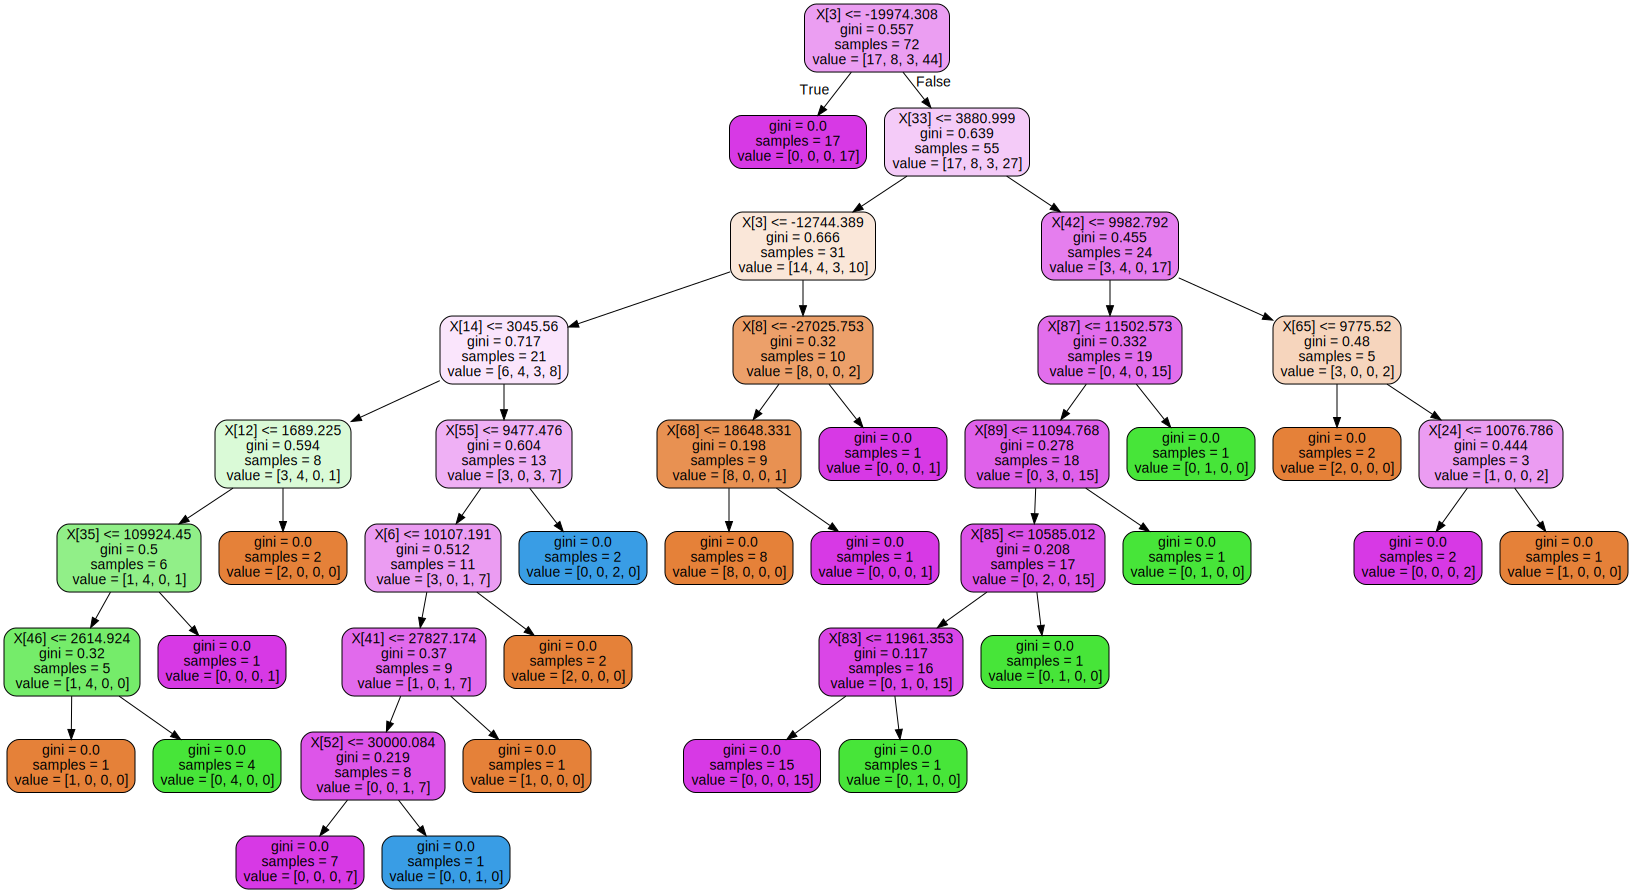

In [16]:
dot_data=tree.export_graphviz(clf,filled=True,rounded=True)
graph=graphviz.Source(dot_data)
graph

#### 第二次训练

In [17]:
X_train,X_test,y_train,y_test=TTS(X,Y,test_size=0.3,random_state=200)
clf1=tree.DecisionTreeClassifier(criterion='gini',min_samples_leaf=5,min_samples_split=5)
clf1=clf1.fit(X_train,y_train)
print(clf1.score(X_train,y_train))
print(clf1.score(X_test,y_test))

0.7638888888888888
0.6451612903225806


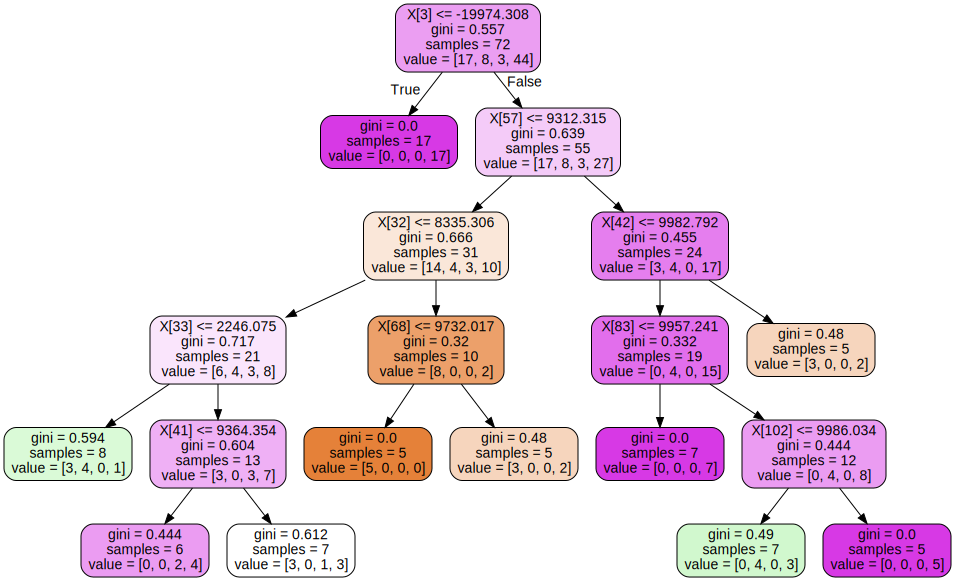

In [18]:
dot_data=tree.export_graphviz(clf1,filled=True,rounded=True)
graph=graphviz.Source(dot_data)
graph